# Import Data

In [52]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [53]:
dataset = pd.read_csv('student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Pre Processing Data

## Check data yang terduplikasi

In [54]:
df = dataset.copy()

In [55]:
#Check Duplicated Data
print("Data Sebelum Pemeriksaan Duplikat:")
print(df.shape)

Data Sebelum Pemeriksaan Duplikat:
(25, 2)


In [56]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


In [57]:
df = df.drop_duplicates()

In [58]:
print("\nData Setelah Pemeriksaan Duplikat:")
print(df.shape)


Data Setelah Pemeriksaan Duplikat:
(25, 2)


## Check Value yang Kosong

In [59]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Check Outliers

In [60]:
from scipy import stats
import pandas as pd

# Function to detect outliers using Z-score
def detect_outliers_zscore(df, threshold=3):
    outliers = {}
    
    # Calculate Z-scores for the DataFrame
    z_scores = stats.zscore(df)
    
    # Convert Z-scores into a DataFrame for easier handling
    z_scores_df = pd.DataFrame(z_scores, columns=df.columns)
    
    # Iterate through each column and detect outliers
    for column in df.columns:
        # Find where absolute Z-score exceeds the threshold (3 by default)
        outliers[column] = df[(z_scores_df[column].abs() > threshold)]
    
    return outliers

# Detect outliers using Z-score method
outliers_zscore = detect_outliers_zscore(dataset)

# Display outliers detected for each column
print("Check Outliers menggunakan metode Z-Score:")
for col, outliers in outliers_zscore.items():
    print(f"{col}:\n{outliers}\n")

Check Outliers menggunakan metode Z-Score:
Hours:
Empty DataFrame
Columns: [Hours, Scores]
Index: []

Scores:
Empty DataFrame
Columns: [Hours, Scores]
Index: []



# Exploratory Data Analysis

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [62]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


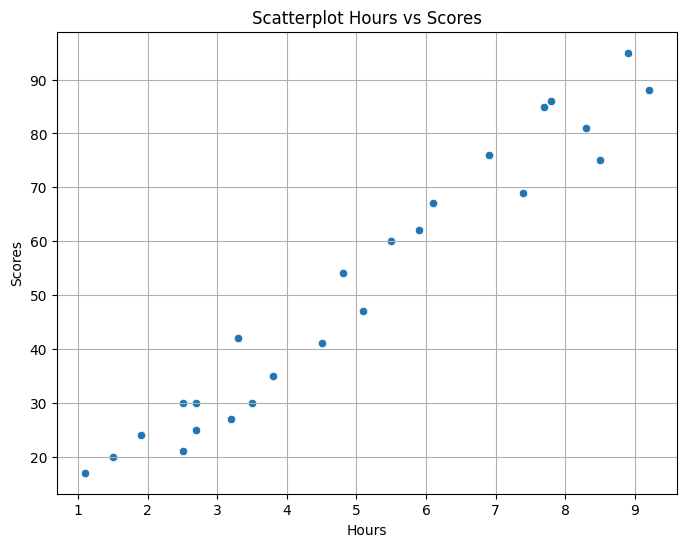

In [63]:
# Scatterplot untuk menunjukkan hubungan antara Jam dan Skor
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours', y='Scores', data=dataset, marker='o')
plt.title('Scatterplot Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

Scatterplot diatas menunjukkan hubungan antara jumlah jam yang dipelajari dan nilai yang diperoleh dalam ujian terdapat tren positif, dimana seiring bertambahnya jam belajar maka nilai ujian cenderung meningkat juga.

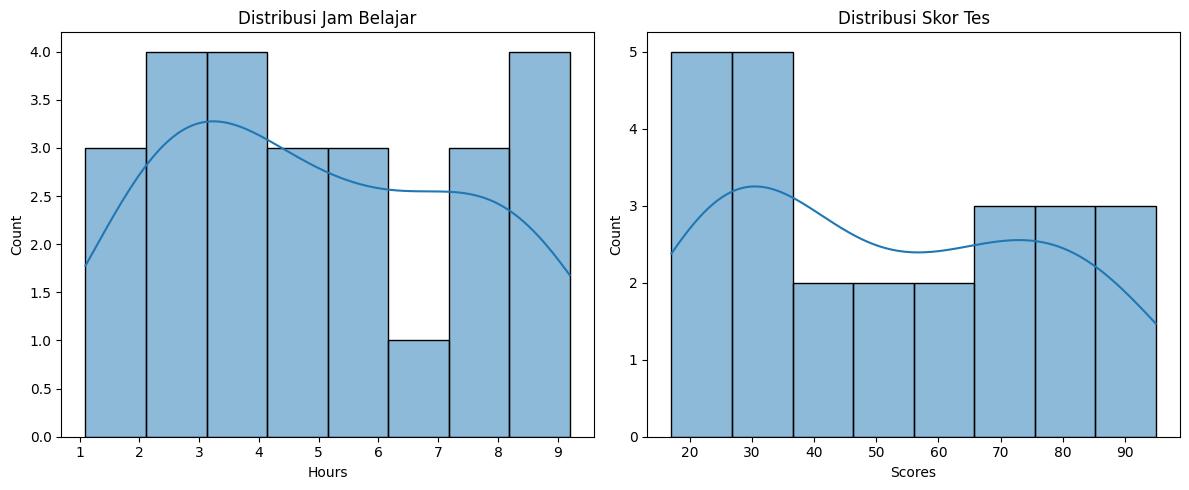

In [64]:
# Distribusi Jam dan Skor menggunakan histogram
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(dataset['Hours'], bins=8, kde=True)
plt.title('Distribusi Jam Belajar')

plt.subplot(1, 2, 2)
sns.histplot(dataset['Scores'], bins=8, kde=True)
plt.title('Distribusi Skor Tes')

plt.tight_layout()
plt.show()

Pada histogram diatas bahwa distribusi Hours menunjukkan pola jam belajar siswa dengan rentang waktu 2-4 jam yang paling banyak, mungkin tidak cukup dalam melakukan persiapan dan ada kendala lain. Sedangkan waktu belajar di rentang waktu 7-9 jam yang paling sedikit, mungkin memiliki komitmen yang tinggi atau kebutuhan belajar yang lebih intensif.

Hal tersebut juga akan berpengaruh pada distribusi Scores yang mana menunjukkan bahwa terdapat beberapa siswa memerlukan bantuan lebih lanjut untuk memperbaiki scores yang diraih dengan diberikan kebutuhan belajar yang insentif dan dukungan agar semangat belajar.

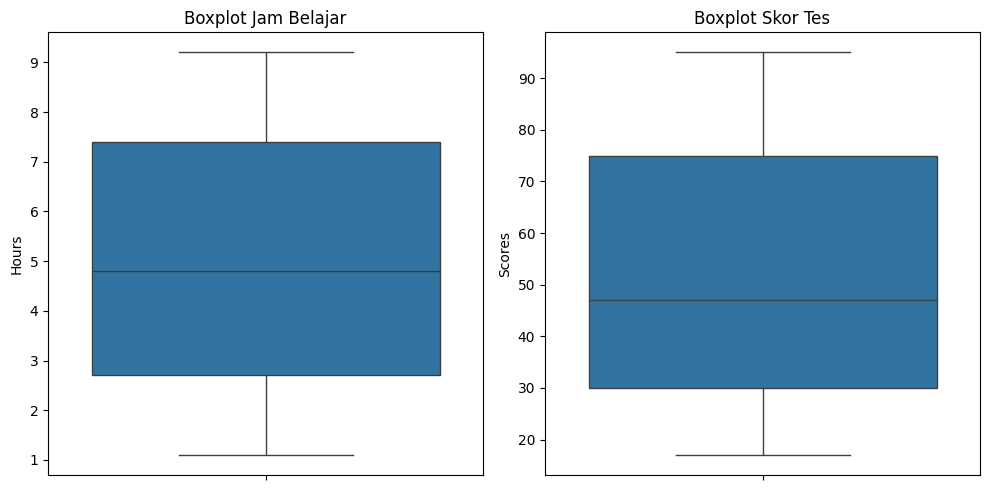

In [65]:
# Boxplot untuk mendeteksi outlier pada Jam dan Skor
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=dataset['Hours'])
plt.title('Boxplot Jam Belajar')

plt.subplot(1, 2, 2)
sns.boxplot(data=dataset['Scores'])
plt.title('Boxplot Skor Tes')

plt.tight_layout()
plt.show()

# Splitting Data

In [66]:
X = dataset['Hours']
X.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [67]:
y = dataset['Scores']
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

# Train Test Split, Memisahkan data untuk dilatih dan diuji

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test size diberikan nilai 0.2 dengan maksud y test 20% dan random state ditentukan agar tidak acak ketika merandom test nya

# Modelling Machine Learning

## Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
# Create new axis for x column in array
import numpy as np
# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [71]:
#array
X_train

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [72]:
#array
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [73]:
y_train

9     25
13    42
1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64

In [74]:
# Fitting the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [75]:
y_pred = lr_model.predict(X_test)

In [76]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [77]:
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

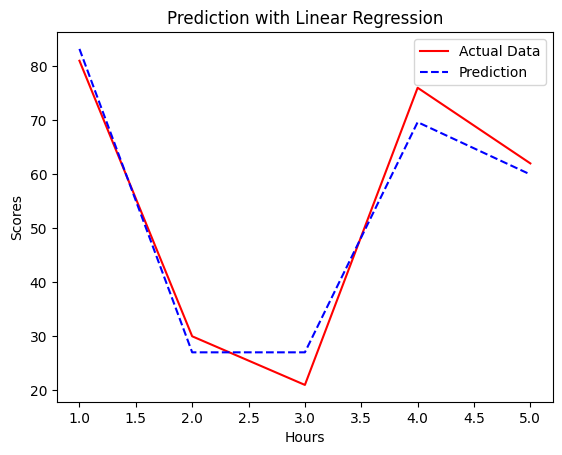

In [78]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [79]:
from sklearn.metrics import r2_score

# Calculate R square vale
rsq_lr = r2_score(y_test,y_pred)

In [80]:
print('r square Linear Regression:',rsq_lr)

r square Linear Regression: 0.9678055545167994


In [81]:
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 2.826892353899737
Coefficient of the line Linear Regression: [9.68207815]


## Decision Tree Regressor

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [84]:
y_pred_dt = dt_model.predict(X_test)

In [85]:
y_pred_dt

array([75. , 27.5, 27.5, 69. , 67. ])

In [86]:
y_test

8     81
16    30
0     21
23    76
11    62
Name: Scores, dtype: int64

In [87]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

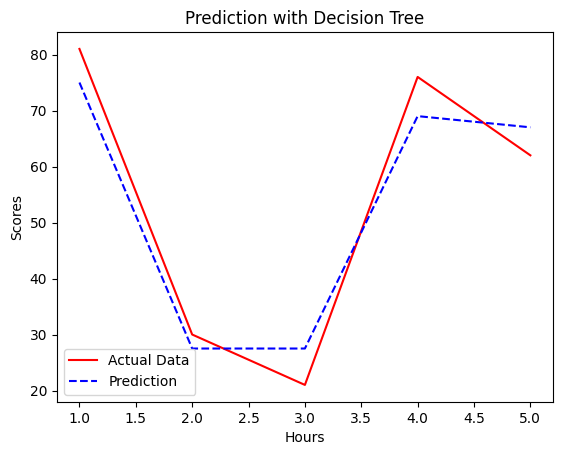

In [88]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [89]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)

In [90]:
print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.9461250849762066


## Random Forest Regressor

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [93]:
y_pred_rf = rf_model.predict(X_test)

In [94]:
y_pred_rf

array([78.73      , 27.92083333, 27.92083333, 73.85      , 63.38      ])

In [95]:
y_test

8     81
16    30
0     21
23    76
11    62
Name: Scores, dtype: int64

In [96]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

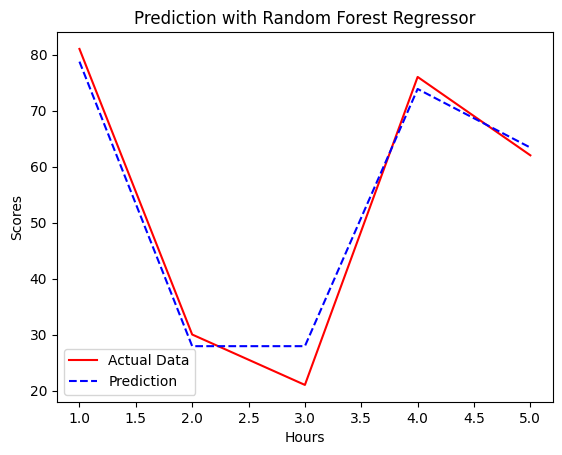

In [97]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_rf,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Random Forest Regressor')
plt.legend()
plt.show()

In [98]:
# Calculate R square vale
rsq_rf = r2_score(y_test,y_pred_rf)

In [99]:
print('r square Random Forest Regressor Results:',rsq_rf)

r square Random Forest Regressor Results: 0.9782798545018506


# Evaluasi Model

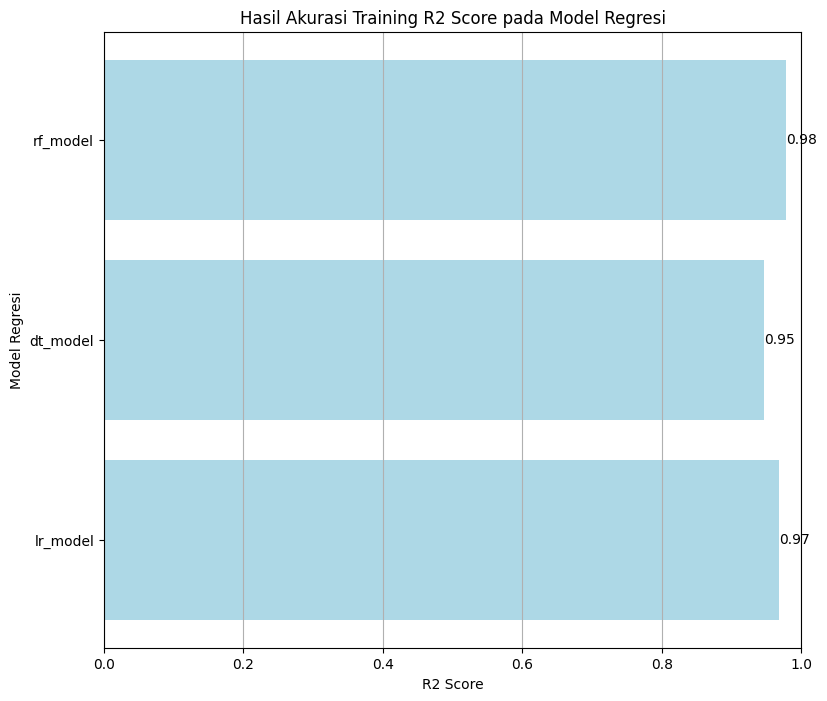

In [100]:
import matplotlib.pyplot as plt

# Nama model dan nilai R^2 (gantilah ini dengan nilai R^2 yang benar)
model_names = ['lr_model', 'dt_model','rf_model']
r2_scores = [rsq_lr, rsq_dt, rsq_rf]  # Gantilah dengan nilai R^2 yang sebenarnya

# Membuat barplot horizontal
plt.figure(figsize=(9, 8))
bars = plt.barh(model_names, r2_scores, color='lightblue')  # Menggunakan barh untuk bar horizontal

# Menambahkan label untuk sumbu X dan Y serta judul
plt.xlabel('R2 Score')
plt.ylabel('Model Regresi')
plt.title('Hasil Akurasi Training R2 Score pada Model Regresi')
plt.xlim(0, 1)  # Membatasi sumbu X dari 0 sampai 1 (rentang R^2)
plt.grid(axis='x')  # Menambahkan grid pada sumbu X

# Menambahkan teks R^2 di samping setiap bar
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center', ha='left')  # Menempatkan nilai R^2 di samping bar

# Menampilkan plot
plt.show()


Dari hasil evaluasi diatas menunjukkan bahwa model Random Forest Regression memiliki akurasi yang paling tinggi dan performa yang sangat baik dibanding dengan model Linear Regression dan Random Forest Regression, yakni sebesar **98%**.